# Xiaotian Tian's Notes on Matplotlib

From [Matplotlib Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

In [3]:
# import basic modules

import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpbl

## Component of a Figure

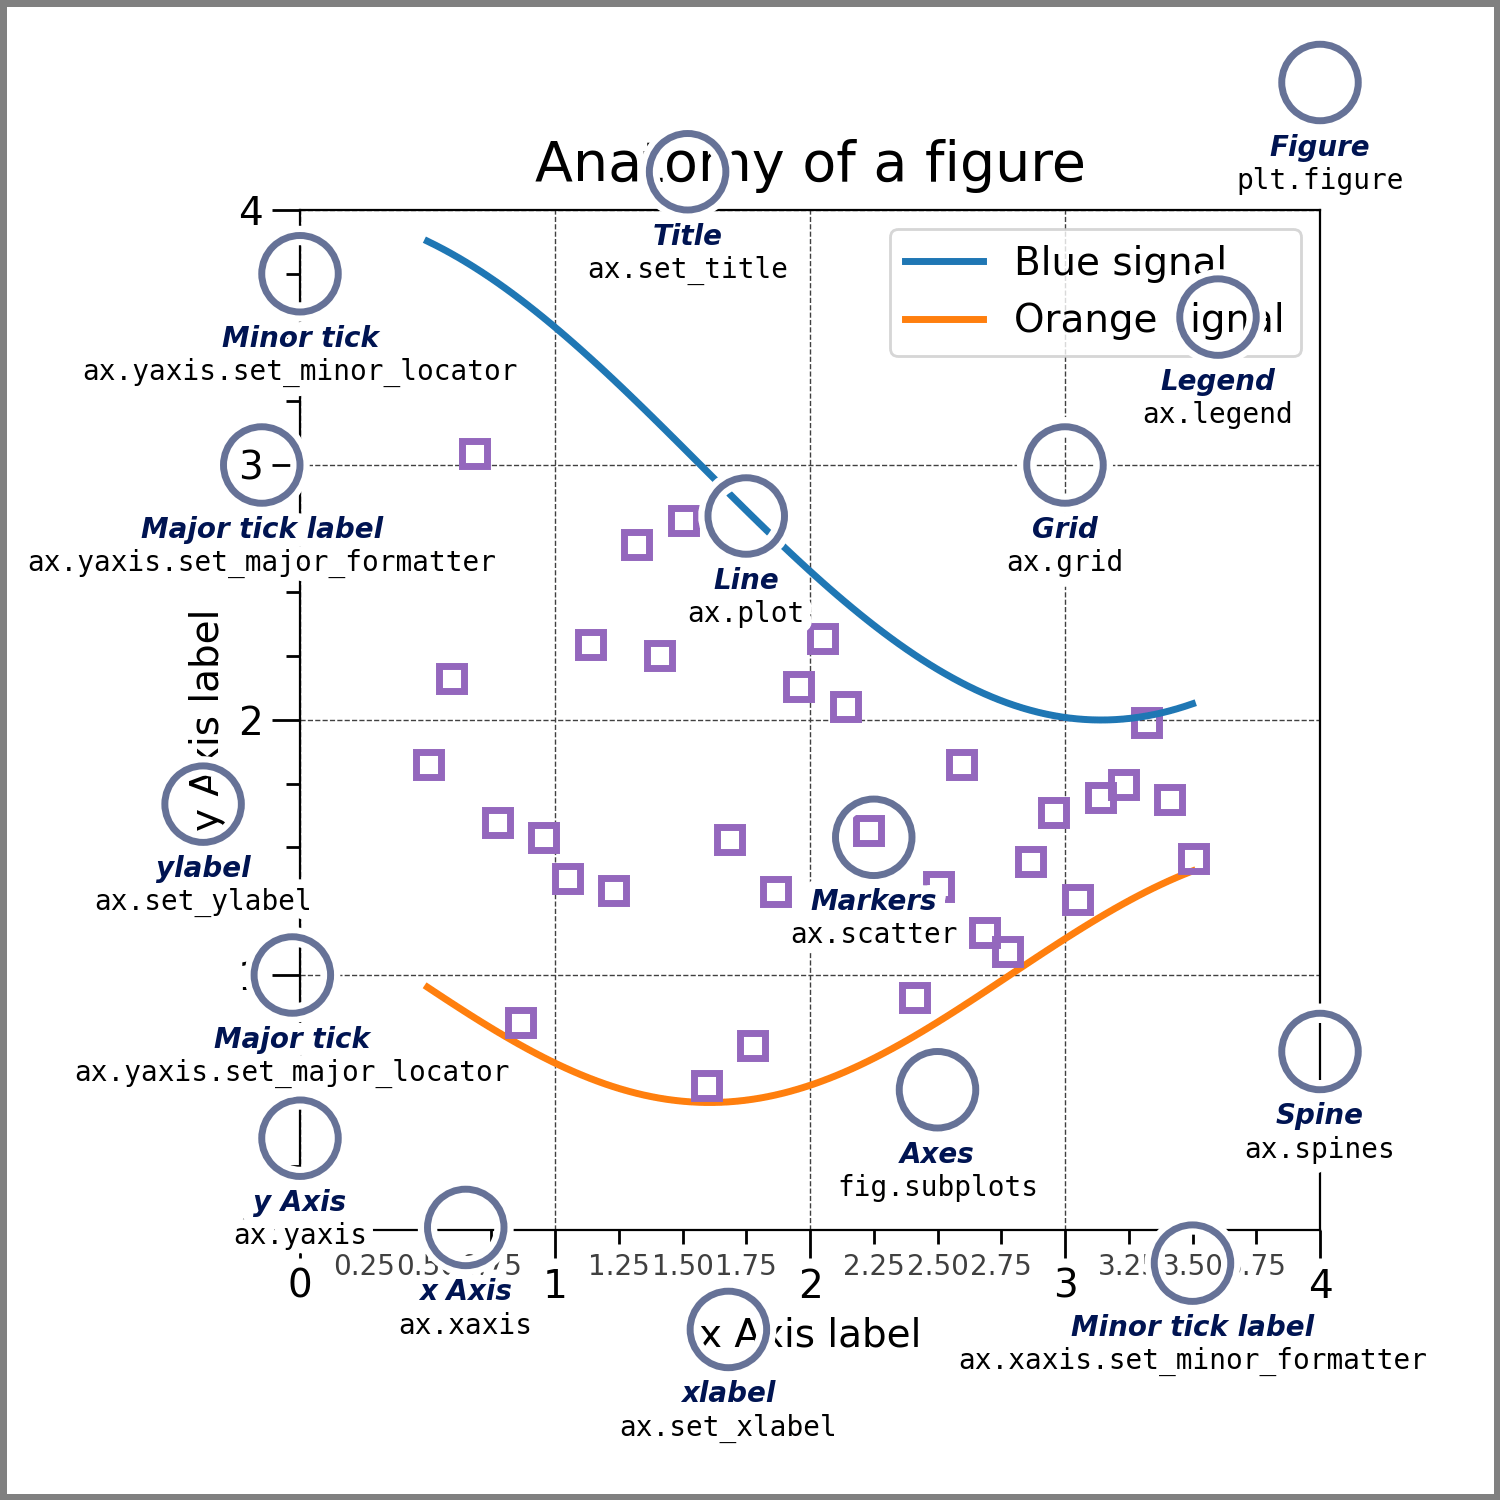

### Figure
The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 640x480 with 0 Axes>

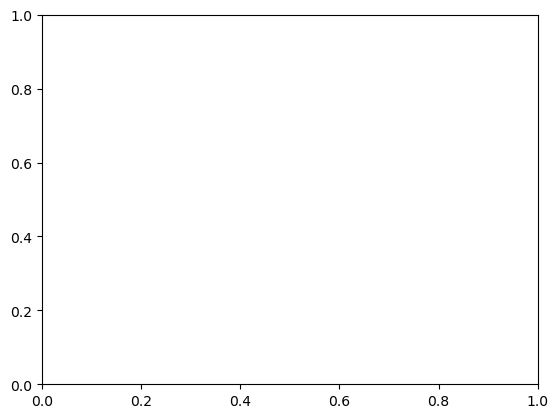

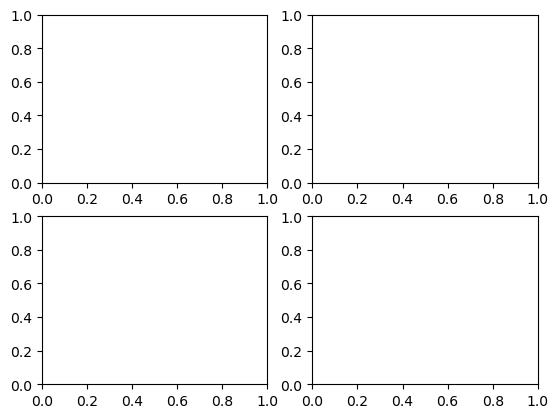

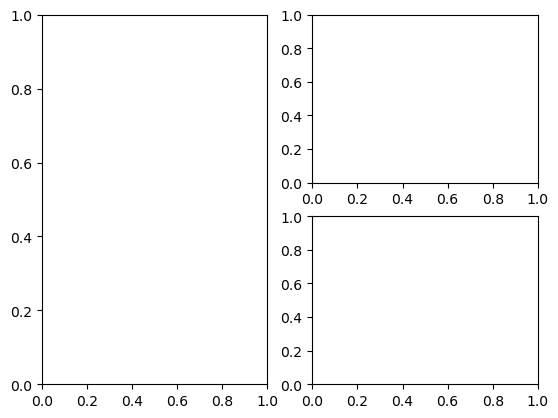

In [4]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on.

### Axes

An Axes is an Artist attached to a Figure that contains a region for plotting data, and usually includes two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) that provide ticks and tick labels to provide scales for the data in the Axes. Each Axes also has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OOP interface, and have most of the plotting methods defined on them (e.g. ax.plot(), shown above, uses the plot method)

### Axis

These objects set the scale and limits and generate ticks (the marks on the Axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

### Artist

Basically, everything visible on the Figure is an Artist (even Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects, etc. When the Figure is rendered, all of the Artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.

## Types of inputs to plotting functions

Plotting functions expect `numpy.array` or `numpy.ma.masked_array` as input, or objects that can be passed to `numpy.asarray`.

Classes that are similar to arrays ('array-like') such as pandas data objects and `numpy.matrix` may not work as intended. Common convention is to convert these to `numpy.array` objects prior to plotting. For example, to convert a `numpy.matrix`

In [5]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Most methods will also parse a string-indexable object like a dict, a structured numpy array, or a `pandas.DataFrame`. Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

Text(0, 0.5, 'entry b')

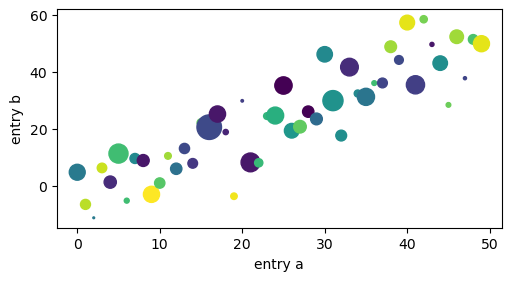

In [6]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## Coding styles

### The explicit and the implicit interfaces

As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").

- Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

See Matplotlib Application Interfaces (APIs) for an explanation of the tradeoffs between the implicit and explicit interfaces.

So one can use the OO-style:

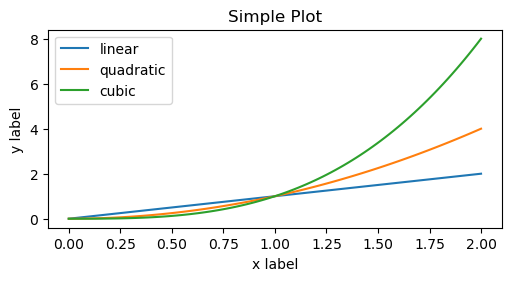

In [7]:
x = np.linspace(0, 2, 100)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or the pyplot-style:

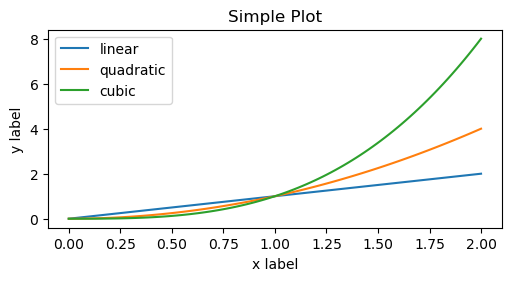

In [8]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

Matplotlib's documentation and examples use both the OO and the pyplot styles. *In general, we suggest using the OO style, particularly for complicated plots, and functions and scripts that are intended to be reused as part of a larger project.* However, the pyplot style can be very convenient for quick interactive work.

## Making Helper Functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [9]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

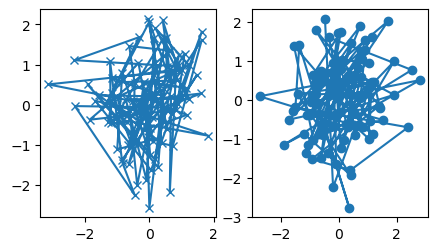

In [10]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

## Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by `plot`, and we set the linestyle of the second line after the fact with `set_linestyle`.

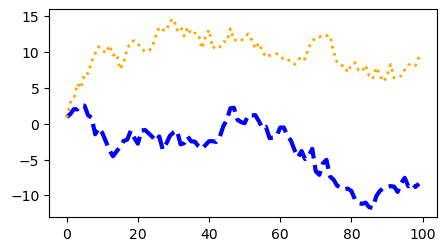

In [11]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see [allowable color definitions](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def) for a list of specifications. Some Artists will take multiple colors. i.e. for a `scatter` plot, the edge of the markers can be different colors from the interior:

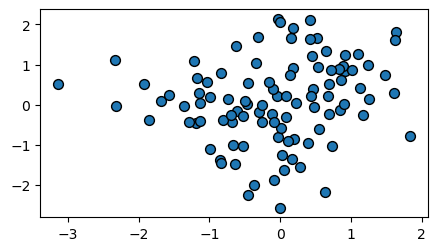

In [12]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k')

### Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle.

Marker size depends on the method being used. `plot` specifies markersize in points, and is generally the "diameter" or width of the marker. `scatter` specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes, or users can define their own `MarkerStyle`:

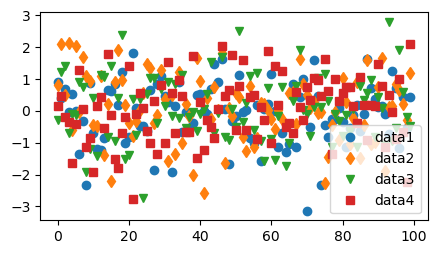

In [13]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend()

## Labelling plots

### Axes labels and text

`set_xlabel`, `set_ylabel`, and `set_title` are used to add text in the indicated locations. Text can also be directly added to plots using text:

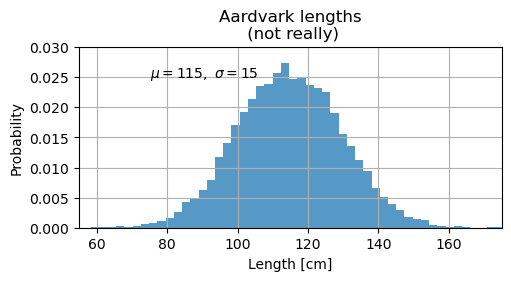

In [14]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

All of the text functions return a `matplotlib.text.Text` instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [15]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

### Using mathematical expressions in text

Matplotlib accepts TeX equation expressions in any text expression. You can write a TeX expression surrounded by dollar signs:

In [16]:
ax.set_title(r'$\sigma_i=15$')

Text(0.5, 1.0, '$\\sigma_i=15$')

where the `r` preceding the title string signifies that the string is a raw string and not to treat backslashes as python escapes.

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

(-2.0, 2.0)

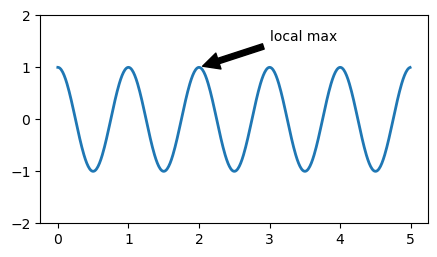

In [17]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose

### Legends

Often we want to identify lines or markers with a `Axes.legend`:

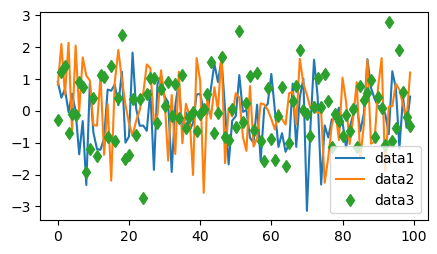

In [18]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

## Axis scales and ticks


Each Axes has two (or three) `Axis` objects representing the x- and y-axis. These control the scale of the Axis, the tick locators and the tick formatters. Additional Axes can be attached to display further Axis objects.

### Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like `loglog`, `semilogx`, and `semilogy`. There are a number of scales. Here we set the scale manually:

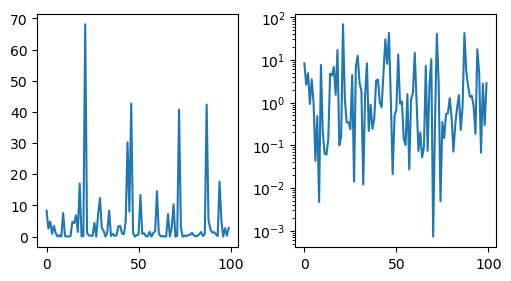

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters

Each Axis has a tick locator and formatter that choose where along the Axis objects to put tick marks. A simple interface to this is `set_xticks`:

Text(0.5, 1.0, 'Manual ticks')

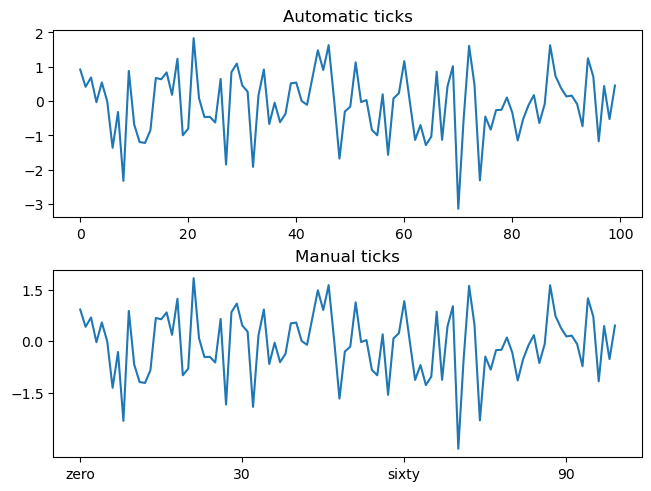

In [20]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

### Plotting dates and strings

Matplotlib can handle plotting arrays of dates and arrays of strings, as well as floating point numbers. These get special locators and formatters as appropriate. For dates:

NameError: name 'mpl' is not defined

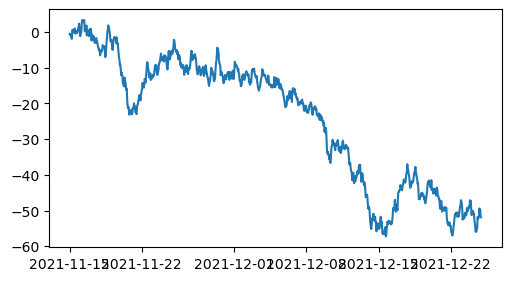

In [23]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf)

(and some more)

## Working with multiple Figures and Axes

You can open multiple Figures with multiple calls to `fig = plt.figure()` or `fig2, ax = plt.subplots()`. By keeping the object references you can add Artists to either Figure.

Multiple Axes can be added a number of ways, but the most basic is `plt.subplots()` as used above. One can achieve more complex layouts, with Axes objects spanning columns or rows, using subplot_mosaic.

Text(0.5, 1.0, 'right')

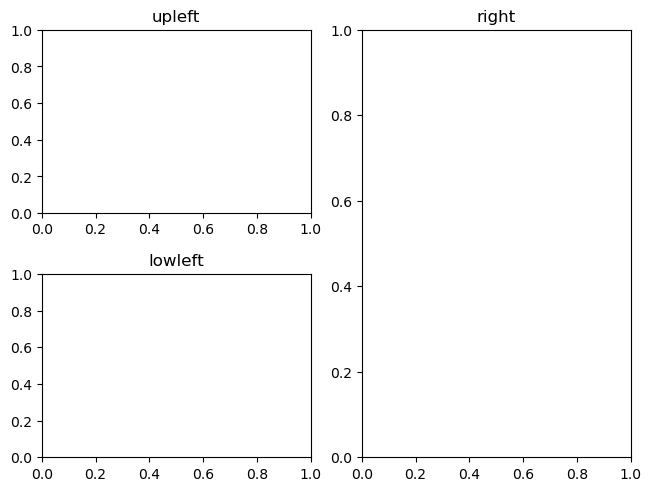

In [24]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')